In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_multilabel_classification

## Russell 2000 Directional Move

In [2]:
DATA = pd.read_csv('IWM_IFRA_IRBO.csv')
DATA['IWM'] = (DATA.IWM > 0).astype(int)
DATA

,Date,IFRA,IRBO,IWM
0,2023-07-05,-0.008439,-0.013893,0
1,2023-07-06,-0.012924,-0.015941,0
2,2023-07-07,0.003376,0.009840,1
3,2023-07-10,0.006461,0.013072,1
4,2023-07-11,0.008976,0.016475,1
...,...,...,...,...
244,2024-06-24,0.009319,-0.010569,1
245,2024-06-25,-0.012167,0.000000,0
246,2024-06-26,-0.000951,0.001214,0
247,2024-06-27,0.001427,0.002120,1


In [3]:
VALS = ['IFRA', 'IRBO']
RESPONSE = 'IWM'
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, VALS], DATA.loc[:, RESPONSE], test_size=0.2, random_state=0)

The model I'm implementing is the Random Forest classification model for the following reason:
1. Through bootstrapping and independtly training each of the decision trees is ~sqrt(p) features, it allows for lower chance of overfitting and can better generalize/capture complex patterns, yielding higher accuracy

In [4]:
from sklearn.ensemble import RandomForestClassifier # importing the random forest module
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.2s
[C

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [5]:
rf = RandomForestClassifier(bootstrap= True, max_depth= 80, max_features= 2, min_samples_leaf= 5, min_samples_split= 8, n_estimators= 200)
rf.fit(X_train,y_train)

# predicted liquidity strengths 
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)


In [6]:
train_error_rf= 1-rf.score(X_train,y_train)
test_error_rf= 1-rf.score(X_test,y_test)
print('Random Forest Training Error = %.3f' % train_error_rf)
print('Random Forest Testing Error = %.3f' % test_error_rf)

train_accuracy_rf= rf.score(X_train,y_train)
test_accuracy_rf= rf.score(X_test,y_test)
print('Random Forest Training Accuracy Score = %.3f' % train_accuracy_rf)
print('Random Forest Testing Accuracy Score = %.3f' % test_accuracy_rf)



Random Forest Training Error = 0.085
Random Forest Testing Error = 0.100
Random Forest Training Accuracy Score = 0.915
Random Forest Testing Accuracy Score = 0.900


              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.90      0.86      0.88        22

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



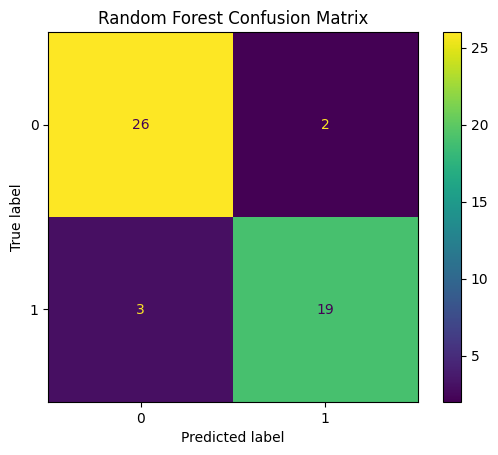

In [7]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot()
plt.title("Random Forest Confusion Matrix")
f1_score_rf= f1_score(y_test, y_test_pred_rf, average='weighted')
print(classification_report(y_test, y_test_pred_rf))

Using the classification report above and the roc AUC score, the logistic classifier had an AUC score of 0.953 which is better than the random forest classifier's AUC of 0.951. Comparing the accuracy score of both, the logistic classifier has a testing accuracy of 0.8958333333333334 and the Random Forest Classifier has a testing accuracy of 0.900 which is slightly higher. Looking at the F1 score for both models, the logistic classifier's one has a range from 0.88 to 0.91 which is also the same range for the Random Forest. Based on these performance values, the random forest classifier performs slightly better due to its higher testing accuracy. 


In [11]:
from sklearn.metrics import roc_auc_score
y_test_pred_rf_proba = rf.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_test_pred_rf_proba, multi_class='ovr')
print('Random Forest Method: ROC AUC=%.3f' % auc_score_rf)

Random Forest Method: ROC AUC=0.951
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, 

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, mi

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=3

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min

## Corporate Bond Ratings Prediction

In [51]:
df = pd.read_csv('bond_rating.csv')
df = df.set_index('Date')
df = df.drop(columns=['Name', 'Symbol','Rating Agency Name'], axis=1)

df

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
Date,,,,,,,,,,,,,,,,,,,,,
11/27/2015,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
2/13/2014,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
3/6/2015,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
6/15/2012,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
10/24/2016,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/5/2012,BBB,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
4/28/2016,BB,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
11/30/2012,B,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168


Explanatory variables: 
currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, netProfitMargin, pretaxProfitMargin, grossProfitMargin, operatingProfitMargin, returnOnAssets, effectiveTaxRate, freeCashFlowOperatingCashFlowRatio, freeCashFlowPerShare, cashPerShare, companyEquityMultiplier, ebitPerRevenue, enterpriseValueMultiple, operatingCashFlowPerShare, operatingCashFlowSalesRatio, payablesTurnover

Response variable:
Bond Rating

In [52]:
rating = {'AAA': 7, 'AA': 6, 'A': 5, 'BBB': 4, 'BB': 3, 'B': 2, 'CCC': 1, 'CC': 0}
df['Rating'] = df['Rating'].map(rating)

In [53]:
df

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
Date,,,,,,,,,,,,,,,,,,,,,
11/27/2015,5.0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
2/13/2014,4.0,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
3/6/2015,4.0,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
6/15/2012,4.0,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
10/24/2016,4.0,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/5/2012,4.0,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
4/28/2016,3.0,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
11/30/2012,2.0,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168


In [54]:
df.loc[:, df.columns != 'Rating'] = scale(df.loc[:,df.columns != 'Rating'])
df

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
Date,,,,,,,,,,,,,,,,,,,,,
11/27/2015,5.0,-0.058665,-0.067633,-0.158433,-0.065125,-0.039746,-0.042541,-0.611864,-0.046856,0.032215,...,-0.018396,0.007377,-0.034640,-0.034467,0.007821,-0.043208,-0.077943,-0.036620,-0.071310,-0.044938
2/13/2014,4.0,-0.056675,-0.065451,-0.129566,-0.066297,-0.038661,-0.042596,-0.613607,-0.046407,0.032225,...,-0.030533,0.034895,-0.034628,-0.034405,-0.001906,-0.043264,-0.079070,-0.036618,-0.070869,-0.044811
3/6/2015,4.0,-0.058261,-0.066870,-0.152179,-0.063632,-0.040533,-0.043099,-0.622884,-0.047010,0.032208,...,-0.017281,0.027304,-0.034620,-0.034440,0.008811,-0.043767,-0.071450,-0.036602,-0.070500,-0.045496
6/15/2012,4.0,-0.056986,-0.065082,-0.137103,-0.065809,-0.042482,-0.049466,-0.685310,-0.048556,0.032202,...,0.133972,-0.146677,-0.034693,-0.034429,0.003512,-0.050134,-0.083569,-0.036669,-0.072863,-0.044049
10/24/2016,4.0,-0.058394,-0.065536,-0.146734,-0.064324,-0.038859,-0.042049,-0.609790,-0.046514,0.032220,...,-0.021771,0.011019,-0.034638,-0.034431,0.007876,-0.042717,-0.075606,-0.036619,-0.071340,-0.045002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/5/2012,4.0,0.186827,0.135444,1.783407,-0.074822,-0.036575,-0.038419,0.955929,-0.045400,0.032239,...,-0.005105,0.143242,-0.034344,-0.032666,-0.017874,-0.039086,-0.061287,-0.036411,-0.070059,-0.029318
4/28/2016,3.0,-0.012870,-0.041268,-0.066739,-0.068183,-0.073966,-0.077771,-0.569938,-0.074482,0.032017,...,-0.003204,0.050874,-0.034649,-0.034499,-0.019533,-0.078442,-0.100225,-0.036656,-0.068463,-0.030920
11/30/2012,2.0,-0.060074,-0.054997,-0.120995,-0.041872,-0.047159,-0.048010,-0.216267,-0.035814,0.032178,...,3.268359,0.136242,-0.034676,-0.034539,0.008129,-0.019189,-0.073593,-0.036699,-0.059759,-0.047055


In [55]:
df = df.dropna()
df

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
Date,,,,,,,,,,,,,,,,,,,,,
11/27/2015,5.0,-0.058665,-0.067633,-0.158433,-0.065125,-0.039746,-0.042541,-0.611864,-0.046856,0.032215,...,-0.018396,0.007377,-0.034640,-0.034467,0.007821,-0.043208,-0.077943,-0.036620,-0.071310,-0.044938
2/13/2014,4.0,-0.056675,-0.065451,-0.129566,-0.066297,-0.038661,-0.042596,-0.613607,-0.046407,0.032225,...,-0.030533,0.034895,-0.034628,-0.034405,-0.001906,-0.043264,-0.079070,-0.036618,-0.070869,-0.044811
3/6/2015,4.0,-0.058261,-0.066870,-0.152179,-0.063632,-0.040533,-0.043099,-0.622884,-0.047010,0.032208,...,-0.017281,0.027304,-0.034620,-0.034440,0.008811,-0.043767,-0.071450,-0.036602,-0.070500,-0.045496
6/15/2012,4.0,-0.056986,-0.065082,-0.137103,-0.065809,-0.042482,-0.049466,-0.685310,-0.048556,0.032202,...,0.133972,-0.146677,-0.034693,-0.034429,0.003512,-0.050134,-0.083569,-0.036669,-0.072863,-0.044049
10/24/2016,4.0,-0.058394,-0.065536,-0.146734,-0.064324,-0.038859,-0.042049,-0.609790,-0.046514,0.032220,...,-0.021771,0.011019,-0.034638,-0.034431,0.007876,-0.042717,-0.075606,-0.036619,-0.071340,-0.045002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/5/2012,4.0,0.186827,0.135444,1.783407,-0.074822,-0.036575,-0.038419,0.955929,-0.045400,0.032239,...,-0.005105,0.143242,-0.034344,-0.032666,-0.017874,-0.039086,-0.061287,-0.036411,-0.070059,-0.029318
4/28/2016,3.0,-0.012870,-0.041268,-0.066739,-0.068183,-0.073966,-0.077771,-0.569938,-0.074482,0.032017,...,-0.003204,0.050874,-0.034649,-0.034499,-0.019533,-0.078442,-0.100225,-0.036656,-0.068463,-0.030920
11/30/2012,2.0,-0.060074,-0.054997,-0.120995,-0.041872,-0.047159,-0.048010,-0.216267,-0.035814,0.032178,...,3.268359,0.136242,-0.034676,-0.034539,0.008129,-0.019189,-0.073593,-0.036699,-0.059759,-0.047055


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Rating'], df.loc[:, df.columns == 'Rating'], test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)

importances

/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0.02677054, 0.02651462, 0.03523975, 0.02771705, 0.09670338,
       0.03532695, 0.03274729, 0.01927771, 0.05522574, 0.06587175,
       0.02166166, 0.01581874, 0.0220923 , 0.01093519, 0.05833929,
       0.0378769 , 0.0317255 , 0.02378198, 0.02906503, 0.01241389,
       0.0676379 , 0.03502415, 0.13272557, 0.05332979, 0.02617732])

In [57]:
important_features = feature_importance_df[feature_importance_df['Importance'] >= 0.04]['Feature']
df = df[['Rating'] + important_features.tolist()]
df

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Rating'], df.loc[:, df.columns == 'Rating'], test_size=0.2, random_state=0)


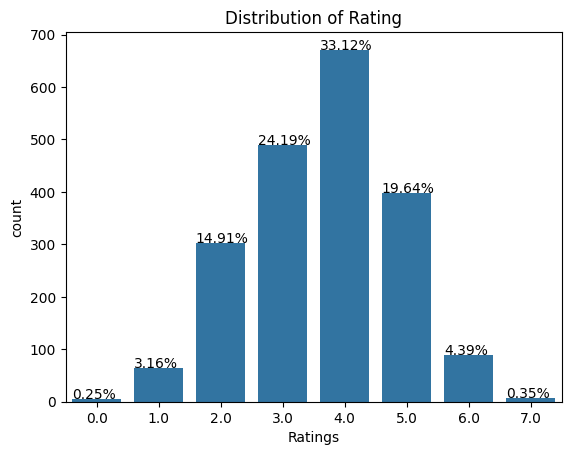

In [58]:
ax = sns.countplot(x = "Rating", data = df)
plt.title('Distribution of Rating')
plt.xlabel('Ratings')
total = len(df["Rating"])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

In [78]:
rating_counts = df['Rating'].value_counts(normalize=True)

# Filter out labels that exist less than 5% of the time
threshold = 0.05
labels_to_keep = rating_counts[rating_counts >= threshold].index
df_balanced = df[df['Rating'].isin(labels_to_keep)]

# Separate features and target variable again after balancing
X_balanced = df_balanced.drop(columns=['Rating'])
y_balanced = df_balanced['Rating']

values_to_remove = [0.0, 1.0, 6.0, 7.0]

df = df[~df['Rating'].isin(values_to_remove)]

# Display the updated dataframe
print(df.head())
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Rating'], df.loc[:, df.columns == 'Rating'], test_size=0.2, random_state=0)


            Rating  operatingCashFlowPerShare  netProfitMargin  \
Date                                                             
11/27/2015     5.0                  -0.036620        -0.039746   
2/13/2014      4.0                  -0.036618        -0.038661   
3/6/2015       4.0                  -0.036602        -0.040533   
6/15/2012      4.0                  -0.036669        -0.042482   
10/24/2016     4.0                  -0.036619        -0.038859   

            ebitPerRevenue  returnOnCapitalEmployed  debtRatio  \
Date                                                             
11/27/2015       -0.043208                 0.031521   0.426124   
2/13/2014        -0.043264                 0.031527   0.104020   
3/6/2015         -0.043767                 0.031515   0.451378   
6/15/2012        -0.050134                 0.031471   0.302077   
10/24/2016       -0.042717                 0.031524   0.427544   

            returnOnAssets  operatingCashFlowSalesRatio  
Date            

The two models I chose were the KNN model and the Random Forest Classifier. I chose the Random Forest Classifier for it's robustness to outliers and ability to handle large datasets with higher dimensionality.  KNN was also chosen because of it's simplicity and no assumptions about the underlying data distribution.

In [83]:
rf = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 4, min_samples_split= 12, n_estimators= 300)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# predicted liquidity strengths 
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
train_accuracy_rf= rf.score(X_train,y_train)
test_accuracy_rf= rf.score(X_test,y_test)
print('Random Forest Training Accuracy Score = %.3f' % train_accuracy_rf)
print('Random Forest Testing Accuracy Score = %.3f' % test_accuracy_rf)

f1_score_rf= f1_score(y_test, y_test_pred_rf, average='weighted')
print(classification_report(y_test, y_test_pred_rf))
#

/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Training Accuracy Score = 0.827
Random Forest Testing Accuracy Score = 0.461
              precision    recall  f1-score   support

         2.0       0.41      0.32      0.36        53
         3.0       0.46      0.39      0.42        94
         4.0       0.45      0.61      0.52       135
         5.0       0.52      0.40      0.45        91

    accuracy                           0.46       373
   macro avg       0.46      0.43      0.44       373
weighted avg       0.46      0.46      0.45       373

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   3.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sampl

In [85]:
y_test_pred_rf_proba = rf.predict_proba(X_test)

auc_score_rf = roc_auc_score(y_test, y_test_pred_rf_proba, multi_class='ovr')
print('Random Forest Method: ROC AUC=%.3f' % auc_score_rf)

Random Forest Method: ROC AUC=0.741


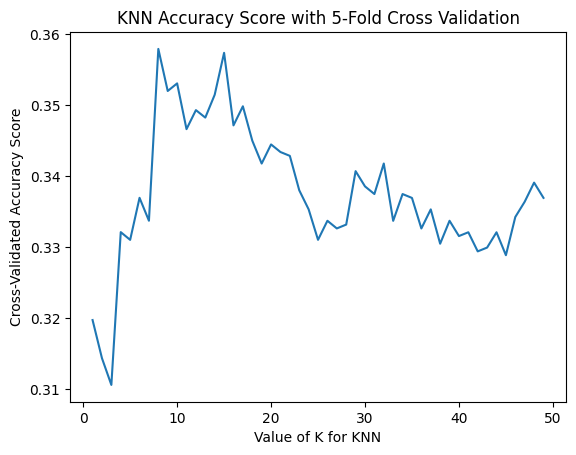

In [87]:
from sklearn.neighbors import KNeighborsClassifier
# Specifying the K of K-Fold CV
k_cv = 5
# choose k between 1 to 50
k_range = range(1, 50)
k_accuracy = []
# use iteration to caclulator different k in the KNN model, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, df.loc[:, df.columns != 'Rating'], df.loc[:, 'Rating'], cv=k_cv, scoring='accuracy')
    k_accuracy.append(accuracy.mean())
    
plt.plot(k_range, k_accuracy)
plt.title('KNN Accuracy Score with '+str(k_cv)+'-Fold Cross Validation')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy Score')
plt.show()

In [89]:
knn = KNeighborsClassifier(n_neighbors=10)
# train the model
knn.fit(X_train, y_train)
# predicted liquidity strengths 
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

train_accuracy_knn= knn.score(X_train,y_train)
test_accuracy_knn= knn.score(X_test,y_test)
print('KNN Training Accuracy Score = %.3f' % train_accuracy_knn)
print('KNN Testing Accuracy Score = %.3f' % test_accuracy_knn)

KNN Training Accuracy Score = 0.503
KNN Testing Accuracy Score = 0.383


/Users/divitpurwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [90]:
f1_score_knn= f1_score(y_test, y_test_pred_knn, average='weighted')
print(classification_report(y_test, y_test_pred_knn))

y_test_pred_knn_proba = knn.predict_proba(X_test)
auc_score_knn = roc_auc_score(y_test, y_test_pred_knn_proba, multi_class='ovr') #'ovr' b/c multi-class problem
print('KNN Classifier: ROC AUC=%.3f' % auc_score_knn)

              precision    recall  f1-score   support

         2.0       0.37      0.26      0.31        53
         3.0       0.30      0.23      0.26        94
         4.0       0.38      0.61      0.47       135
         5.0       0.52      0.26      0.35        91

    accuracy                           0.38       373
   macro avg       0.39      0.34      0.35       373
weighted avg       0.39      0.38      0.37       373

KNN Classifier: ROC AUC=0.592


Although the testing accuracy may seems low, it's far better than guessing random as there is a 1/4 chance of getting it right. The random forest classifier has an accuracy double of that and a AUC of 0.741. The same cannot be said with the KNN model as it has 0.383 accuracy and an AUC of 0.592. It is better than guessing but shows it isn't the most optimal choice.

Based on the performance statitsics, the Random Forest Classifier model performs the best. 

Bond ratings can affect stock prices because they reflect a company's financial position and "risk". These can invariably lead to influencing a buyers decisions. High ratings like AAA reflect that there is stability and lower borrowing costs, leading to higher stock prices. And vice versa, low ratings result in higher risk and borrowing costs. These bond ratings can also reflect a compnay's growth as it signals there ability to raise capital. 